# Momentum on Cryptocurrency

### Read data

In [124]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

data_path = os.getcwd() + '/data/'
currencies = ['bch', 'btc', 'xrp', 'xlm', 'eos', 'eth', 'ltc']

df = {}
for file in currencies:
    df[file] = pd.read_csv(data_path + file + '.csv')
wallet = pd.read_csv(data_path + 'wallet.csv')

In [26]:
wallet.head()

,Date,Value
0,2019-12-20,44456197.0
1,2019-12-19,44438250.0
2,2019-12-18,44400348.0
3,2019-12-17,44374719.0
4,2019-12-16,44346912.0


In [27]:
print(df['btc'].head())

         date  AdrActCnt  BlkCnt  BlkSizeByte  BlkSizeMeanByte  CapMVRVCur  \
0  2009-01-03          0       0            0              NaN         NaN   
1  2009-01-04          0       0            0              NaN         NaN   
2  2009-01-05          0       0            0              NaN         NaN   
3  2009-01-06          0       0            0              NaN         NaN   
4  2009-01-07          0       0            0              NaN         NaN   

   CapMrktCurUSD  CapRealUSD  DiffMean  FeeMeanNtv  ...  TxTfrValAdjUSD  \
0            NaN         0.0       NaN         NaN  ...             NaN   
1            NaN         0.0       NaN         NaN  ...             NaN   
2            NaN         0.0       NaN         NaN  ...             NaN   
3            NaN         0.0       NaN         NaN  ...             NaN   
4            NaN         0.0       NaN         NaN  ...             NaN   

   TxTfrValMeanNtv  TxTfrValMeanUSD  TxTfrValMedNtv  TxTfrValMedUSD  \
0        

### Feature engineering

In [125]:
for currency in currencies:
    df[currency] = pd.DataFrame({'date': df[currency]['date'], 
                                 'price': df[currency]['PriceUSD']})
    df[currency]['date'] = pd.to_datetime(df[currency]['date'])
    df[currency]['week'] = df[currency]['date'].dt.week
    df[currency]['month'] = df[currency]['date'].dt.month
    df[currency]['year'] = df[currency]['date'].dt.year
    df[currency]['price_lag1'] = df[currency]['price'].shift(1)
    df[currency]['ret'] = df[currency]['price']/df[currency]['price_lag1'] - 1
    df[currency]['logret'] = np.log(1 + df[currency]['ret'])
    for count in range(1,8):
        colname = 'ret_lead' + str(count)
        df[currency][colname] = df[currency]['ret'].shift(-1 * count)
    df[currency] = df[currency][df[currency]['price'].notnull()]

### Data looks like this

In [126]:
df['btc'].head(10)

,date,price,week,month,year,price_lag1,ret,logret,ret_lead1,ret_lead2,ret_lead3,ret_lead4,ret_lead5,ret_lead6,ret_lead7
561,2010-07-18,0.085840,28,7,2010,NaN,NaN,NaN,-0.058714,-0.075053,0.059639,-0.261679,0.036311,-0.099894,-0.073329
562,2010-07-19,0.080800,29,7,2010,0.085840,-0.058714,-0.060508,-0.075053,0.059639,-0.261679,0.036311,-0.099894,-0.073329,0.108020
563,2010-07-20,0.074736,29,7,2010,0.080800,-0.075053,-0.078019,0.059639,-0.261679,0.036311,-0.099894,-0.073329,0.108020,0.046822
564,2010-07-21,0.079193,29,7,2010,0.074736,0.059639,0.057928,-0.261679,0.036311,-0.099894,-0.073329,0.108020,0.046822,0.004931
565,2010-07-22,0.058470,29,7,2010,0.079193,-0.261679,-0.303376,0.036311,-0.099894,-0.073329,0.108020,0.046822,0.004931,0.186534
566,2010-07-23,0.060593,29,7,2010,0.058470,0.036311,0.035668,-0.099894,-0.073329,0.108020,0.046822,0.004931,0.186534,-0.075002
567,2010-07-24,0.054540,29,7,2010,0.060593,-0.099894,-0.105243,-0.073329,0.108020,0.046822,0.004931,0.186534,-0.075002,0.044673
568,2010-07-25,0.050541,29,7,2010,0.054540,-0.073329,-0.076157,0.108020,0.046822,0.004931,0.186534,-0.075002,0.044673,-0.095429
569,2010-07-26,0.056000,30,7,2010,0.050541,0.108020,0.102574,0.046822,0.004931,0.186534,-0.075002,0.044673,-0.095429,-0.018003
570,2010-07-27,0.058622,30,7,2010,0.056000,0.046822,0.045759,0.004931,0.186534,-0.075002,0.044673,-0.095429,-0.018003,0.000203


### Cryptocurrency Historical Price

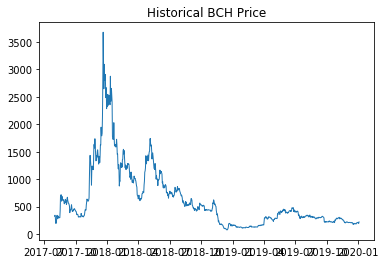

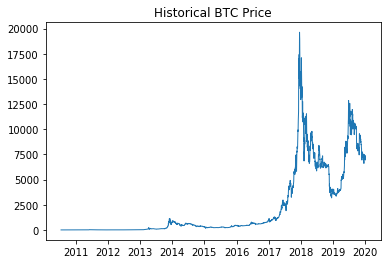

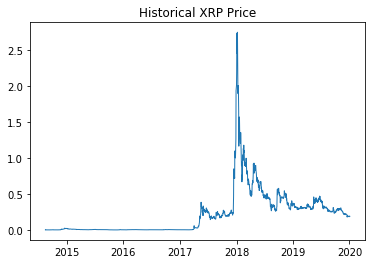

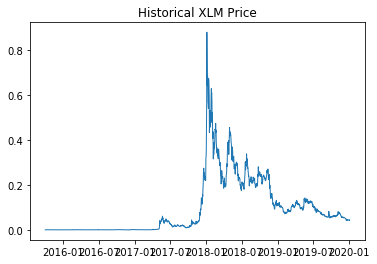

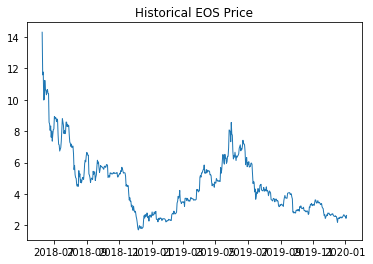

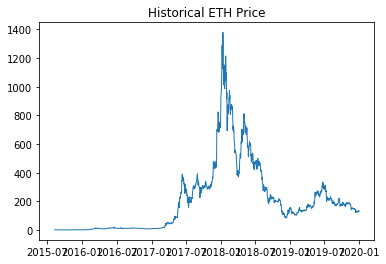

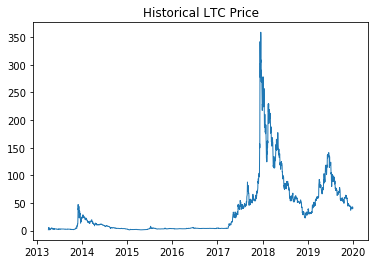

In [127]:
for currency in currencies:
    plt.plot(df[currency]['date'], df[currency]['price'], linewidth=1)
    plt.title('Historical ' + currency.upper() + ' Price')
    plt.show()

### Cryptocurrency Historical Returns

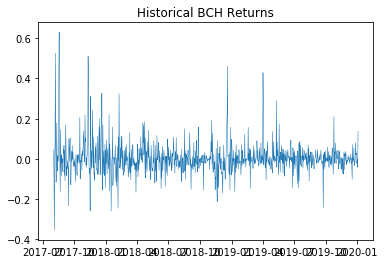

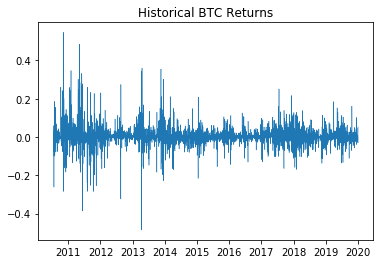

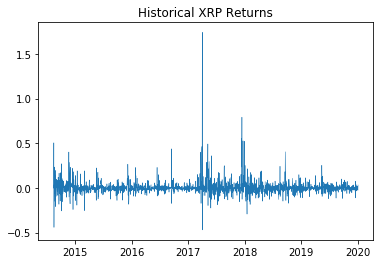

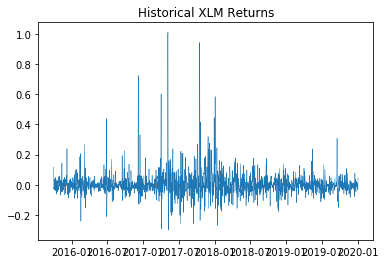

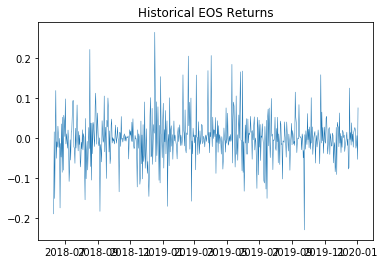

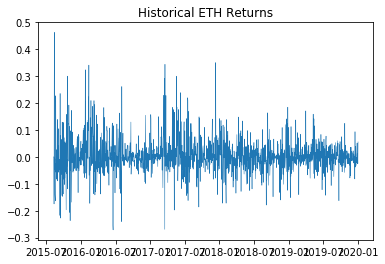

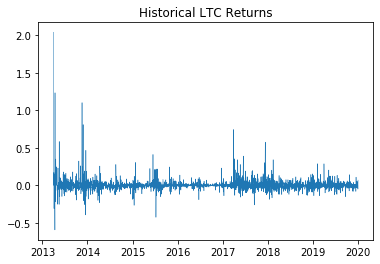

In [128]:
for currency in currencies:
    plt.plot(df[currency]['date'], df[currency]['ret'], linewidth=0.5)
    plt.title('Historical ' + currency.upper() + ' Returns')
    plt.show()

### Cryptocurrency Historical Daily Returns Distribution

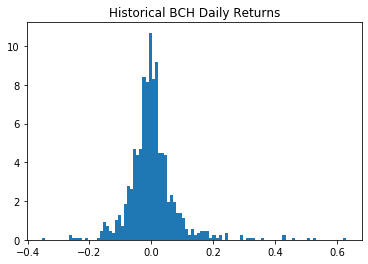

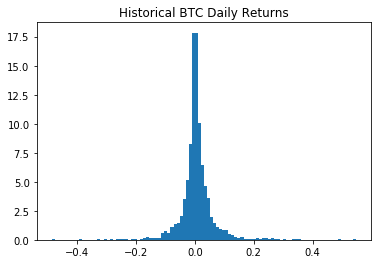

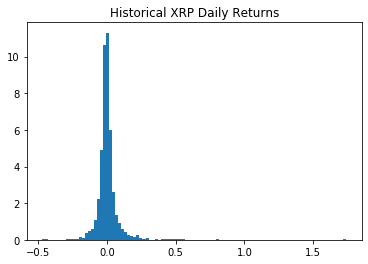

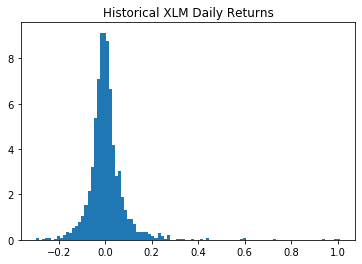

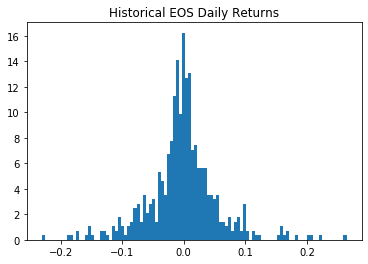

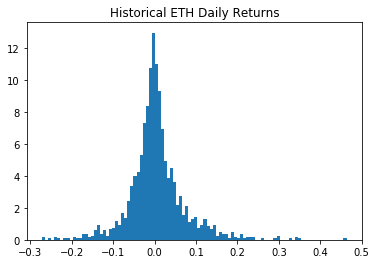

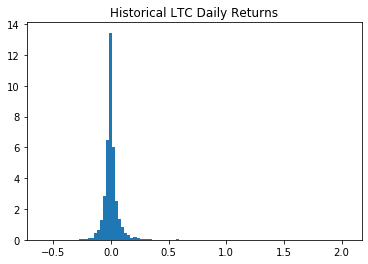

In [129]:
for currency in currencies:
    plt.hist(df[currency]['ret'], normed = True, bins = 100)
    plt.title('Historical ' + currency.upper() + ' Daily Returns')
    plt.show()

### Aggregating price returns data into weekly basis

In [ ]:
df_weekly = {}
for currency in currencies:
    df_weekly[currency] = df[currency].groupby(['week','year']).agg({'date': 'min'})

### Aggregating price returns data into monthly basis

In [ ]:
df_monthly = {}
for currency in currencies:
    pass

### Prediction of future return on current return

In [140]:
# y: future return ~ x: current return
import statsmodels.api as sm
# result_table = {}
for currency in currencies:
    for count in range(1,8):
        y = df[currency]['ret_lead' + str(count)]
        X = df[currency]['ret']
        X = sm.add_constant(X)
        model = sm.OLS(y, X, missing = 'drop').fit()
#         print(model.summary())
        result = pd.DataFrame({'Lead': count, 
                               'Params': model.params,  
                               'R-squared': model.rsquared,  
                               'P-value': model.pvalues})
        print(result)
    print('---')

       Lead    Params  R-squared   P-value
const     1  0.002229   0.019465  0.410679
ret       1  0.139714   0.019465  0.000031
       Lead    Params  R-squared   P-value
const     2  0.002646   0.000635  0.333475
ret       2  0.025217   0.000635  0.454378
       Lead    Params  R-squared   P-value
const     3  0.003187   0.000884  0.239339
ret       3 -0.029423   0.000884  0.377697
       Lead    Params  R-squared   P-value
const     4  0.003187     0.0005  0.239882
ret       4 -0.022126     0.0005  0.507377
       Lead    Params  R-squared   P-value
const     5  0.003002   0.000159  0.268616
ret       5  0.012478   0.000159  0.708527
       Lead    Params  R-squared   P-value
const     6  0.002399   0.000268  0.365294
ret       6  0.015797   0.000268  0.627816
       Lead   Params  R-squared   P-value
const     7  0.00234   0.000141  0.377672
ret       7  0.01145   0.000141  0.725361
---
       Lead    Params  R-squared       P-value
const     1  0.004614   0.001529  8.487170e-07
re